<a href="https://colab.research.google.com/github/lillyvernor/Regression-Exploration/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary packages

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data loading and cleaning**

Link to data: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
uploaded=files.upload()

Saving lifeexpectancy.csv to lifeexpectancy.csv


In [3]:
data = pd.read_csv("lifeexpectancy.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#investigate data types
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
#length of whole data 
len(data)

2938

In [ ]:
#summary statistics
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f255aa37d50>,
      dtype=object)

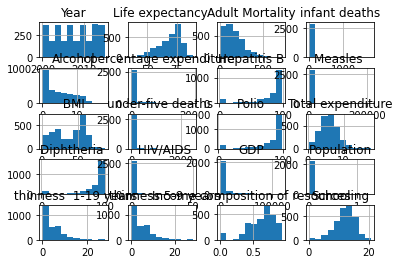

In [ ]:
#histogram of features
data.hist()

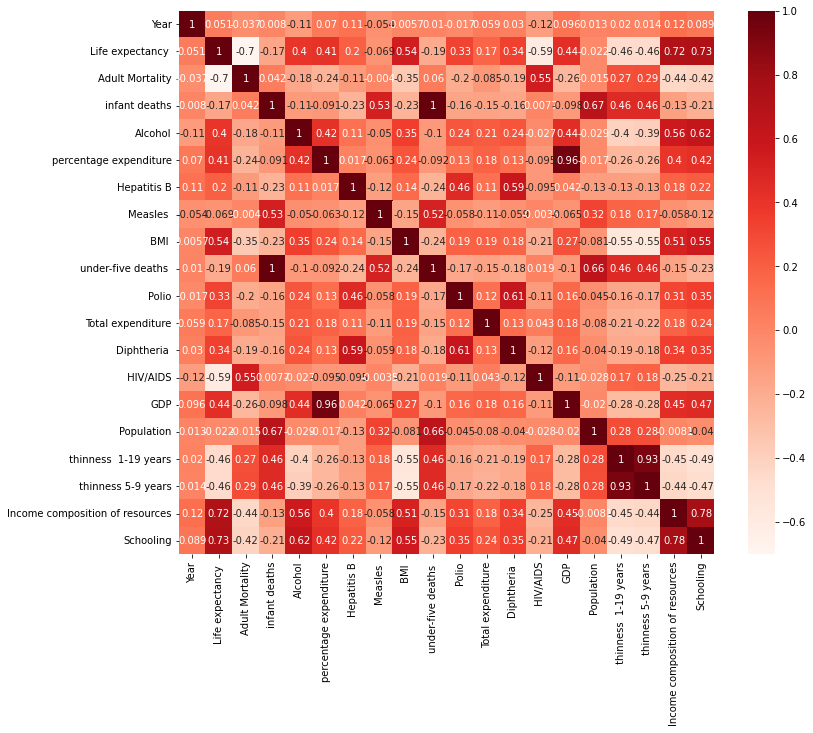

In [ ]:
#correlation matrix 
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#drop categorical features
data = data.drop(["Country", "Year", "Status"],1)

In [ ]:
data.isna().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#drop rows with missing values 
data = data.dropna()

In [6]:
X = data.drop("Life expectancy ",1)   #Feature Matrix
y = data["Life expectancy "]   

In [ ]:
#initialize lists to save rmse and time values
RMSE = []
time_passed = []

# Linear Regression

**Feature Engineering**

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Life expectancy '])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Life expectancy                    1.000000
Adult Mortality                    0.702523
 BMI                               0.542042
 HIV/AIDS                          0.592236
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy , dtype: float64

In [ ]:
#selecting only highly correlated features
X_1 = X[[' BMI ','Adult Mortality',' HIV/AIDS','Income composition of resources','Schooling']]

In [7]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Adult Mortality', 'infant deaths', 'percentage expenditure', ' BMI ', 'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
#drop features not outputted from backward elimination
X_2 = X.drop(columns = ['Alcohol','Hepatitis B','Measles ','Polio','Total expenditure','GDP','Population', ' thinness  1-19 years', ' thinness 5-9 years'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(
        X_1, y, test_size = 0.3, random_state = 0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(
        X_2, y, test_size = 0.3, random_state = 0)

In [ ]:
#linear regression model 1 using correlation values
import time

time_start = time.clock()
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train1,y_train1)
y_prediction1 =  LR.predict((x_test1)
 (time.clock() - time_start)

SyntaxError: ignored

In [ ]:
#linear regression model 1 metrics
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score1 =r2_score(y_test1,y_prediction1)
print("r2 score is",score1)
print("MSE is", mean_squared_error(y_test1,y_prediction1))
print("RMSE is", np.sqrt(mean_squared_error(y_test1,y_prediction1)))


r2 score is 0.8158088989143987
MSE is 15.084545009661246
RMSE is 3.8838827234690347


In [ ]:
#linear regression model 2 backward elimination
import time

time_start = time.clock()
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
results = LR.fit(x_train2,y_train2)
y_prediction2 =  LR.predict(x_test2)
lr_time_elapsed = (time.clock() - time_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


In [ ]:
#investigate coefficients of final model 
coeff_df = pd.DataFrame(LR.coef_, X_2.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Adult Mortality,-0.017688
infant deaths,0.079172
percentage expenditure,0.000478
BMI,0.047362
under-five deaths,-0.060440
Diphtheria,0.016848
HIV/AIDS,-0.433319
Income composition of resources,8.828634
Schooling,0.898305


In [ ]:
#metrics for linear regression model 2
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score2 =r2_score(y_test2,y_prediction2)
print("r2 score is",score2)
print("MSE is", mean_squared_error(y_test2,y_prediction2))
print("RMSE is", np.sqrt(mean_squared_error(y_test2,y_prediction2)))

r2 score is 0.8373326230257985
MSE is 13.321834524625098
RMSE is 3.6499088378513096


In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test2,y_prediction2))

In [ ]:
#append RMSE and time to lists 
RMSE.append(lr_rmse)
time_passed.append(lr_time_elapsed)

# Ridge Regression

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
###scale the data to have mean 0 stdev 1
df_scaled = preprocessing.scale(data)
df_scaled= pd.DataFrame(data)


###list of predictors for legend
X = df_scaled.drop("Life expectancy ",1)   #Feature Matrix
y = df_scaled["Life expectancy "] 

predictors = list(X.columns.values)[1:9]

In [ ]:
#########VIF Calculations
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature         VIF
0                   Adult Mortality    4.160178
1                     infant deaths  222.073491
2                           Alcohol    4.070163
3            percentage expenditure   14.825787
4                       Hepatitis B   17.396978
5                          Measles     1.571070
6                              BMI     8.287476
7                under-five deaths   210.862351
8                             Polio   24.893553
9                 Total expenditure    8.139036
10                      Diphtheria    33.100694
11                         HIV/AIDS    1.632647
12                              GDP   16.554311
13                       Population    2.013897
14             thinness  1-19 years   15.792641
15               thinness 5-9 years   15.953887
16  Income composition of resources   37.383260
17                        Schooling   56.738013


In [ ]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.72808e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.99289e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.25444e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.17024e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46643e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

{'alpha': 1e-15}
-15.348117034592144


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.47843e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.27893e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.36728e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.38457e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.5083e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

In [ ]:

import time
from sklearn import metrics
time_start = time.clock()
# define model
model = Ridge(alpha=1e-15)
# fit model
model.fit(x_train, y_train)
# make a prediction
yhat = model.predict(x_test)
#predict
time_elapsed = (time.clock() - time_start)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat)) 
print('Time elapsed:', time_elapsed)

Mean Squared Error: 13.217419559024433
Time elapsed: 0.010779000000001204


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.0478e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


In [ ]:
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test,yhat))
ridge_time_elapsed = time_elapsed

In [ ]:
#append RMSE and time to lists
RMSE.append(ridge_rmse)
time_passed.append(ridge_time_elapsed)

# Lasso Regression

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

KeyboardInterrupt: ignored

In [ ]:
import time
from sklearn import metrics
time_start = time.clock()
# define model
model = Lasso(alpha=.01)
# fit model
model.fit(x_train, y_train)
# make a prediction
yhat = model.predict(x_test)
#predict
time_elapsed = (time.clock() - time_start)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat)) 
print('Time elapsed:', time_elapsed)

Mean Squared Error: 13.27250149376142
Time elapsed: 0.05465200000000081


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7453.685161357737, tolerance: 8.690790950606587
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, yhat))
lasso_time = time_elapsed

In [ ]:
RMSE.append(lasso_rmse)
time_passed.append(lasso_time)

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

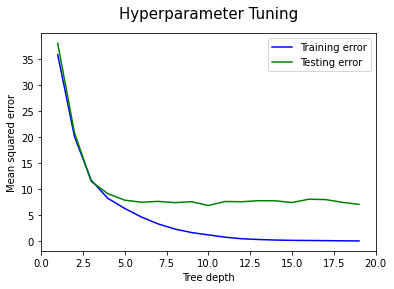

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(x_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(x_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.xlim(0,20)
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [ ]:
import time

time_start = time.clock()
from sklearn import metrics

#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=8,
                             random_state=1)

#Fit (train) the model
dtr1.fit(x_train, y_train)

#predict
predictions = dtr1.predict(x_test)
time_elapsed = (time.clock() - time_start)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)) 
print('Time elapsed:', time_elapsed)

Mean Squared Error: 7.3592039375663365
Time elapsed: 0.020257999999998333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


In [ ]:
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
dt_time = time_elapsed

In [ ]:
RMSE.append(dt_rmse)
time_passed.append(dt_time)

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [ ]:
import time

time_start = time.clock()
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);
time_elapsed = (time.clock() - time_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
rf_time = time_elapsed

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

In [ ]:
# Evaluating the Random forest Algorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.203560808080802
Mean Squared Error: 3.4673030948282864
Root Mean Squared Error: 1.8620695730364873


In [ ]:
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [ ]:
RMSE.append(rf_rmse)
time_passed.append(rf_time)

In [ ]:
# Saving feature names for later use
feature_list = list(X.columns)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income composition of resources Importance: 0.57
Variable:  HIV/AIDS            Importance: 0.2
Variable: Adult Mortality      Importance: 0.14
Variable: Alcohol              Importance: 0.01
Variable:  BMI                 Importance: 0.01
Variable: Total expenditure    Importance: 0.01
Variable:  thinness  1-19 years Importance: 0.01
Variable:  thinness 5-9 years  Importance: 0.01
Variable: Schooling            Importance: 0.01
Variable: infant deaths        Importance: 0.0
Variable: percentage expenditure Importance: 0.0
Variable: Hepatitis B          Importance: 0.0
Variable: Measles              Importance: 0.0
Variable: under-five deaths    Importance: 0.0
Variable: Polio                Importance: 0.0
Variable: Diphtheria           Importance: 0.0
Variable: GDP                  Importance: 0.0
Variable: Population           Importance: 0.0


# AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
pre_gs_inst.best_params_

{'learning_rate': 0.3, 'loss': 'exponential', 'n_estimators': 50}

In [ ]:
###### Adaboost Regression in Python #######
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
 
#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=.3)

In [ ]:
#Printing all the parameters of Adaboost
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
import time

time_start = time.clock()
#Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)
time_elapsed = (time.clock() - time_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [ ]:
ada_time = time_elapsed

In [ ]:
#metrics for AdaBoost
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 3.7488715210161603
Mean Squared Error: 24.431522564267127
Root Mean Squared Error: 4.942825362509495


In [ ]:
ada_rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

In [ ]:
RMSE.append(ada_rmse)
time_passed.append(ada_time)

# XGBoost

In [ ]:

# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [ ]:
import datetime
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   16.9s finished


0.9326188600447335
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,
                max_depth = 6, alpha = 10, n_estimators = 500)

In [ ]:
import time

time_start = time.clock()
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)
time_elapsed = (time.clock() - time_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


[19:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [ ]:
xgb_time = time_elapsed

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)

In [ ]:
RMSE.append(xgb_rmse)
time_passed.append(xgb_time)

# Neural Network

In [ ]:
y = np.array(y)

In [ ]:
X = sm.add_constant(X, prepend=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


Input layer = number of features + 1

In [ ]:
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(1236, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 1236)              24720     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1237      
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time

time_start = time.clock()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)
time_elapsed = (time.clock() - time_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
7/7 [==============================] - 1s 33ms/step - loss: 0.2341 - mse: 0.2341 - mae: 0.4415 - val_loss: 0.0787 - val_mse: 0.0787 - val_mae: 0.2446
Epoch 2/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1720 - val_loss: 0.0598 - val_mse: 0.0598 - val_mae: 0.1970
Epoch 3/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1641 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1211
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0273 - mse: 0.0273 - mae: 0.1331 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1417
Epoch 5/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1285 - val_loss: 0.0170 - val_mse: 0.0170 - val_mae: 0.1022
Epoch 6/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0965 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0961
Epoch 7/30
7/7 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [ ]:
nn_time = time_elapsed

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[75.70461 ],
       [64.941986],
       [71.58099 ],
       [72.75278 ],
       [78.10235 ],
       [55.065796],
       [60.789917],
       [72.18701 ],
       [73.06487 ],
       [69.55982 ],
       [76.75818 ],
       [72.3929  ],
       [86.28684 ],
       [75.66775 ],
       [72.61633 ],
       [54.461697],
       [74.45461 ],
       [67.16885 ],
       [78.50232 ],
       [63.09278 ],
       [69.93168 ],
       [66.525795],
       [56.896126],
       [75.831726],
       [67.46409 ],
       [74.541565],
       [67.33569 ],
       [71.420815],
       [63.613552],
       [76.38948 ],
       [58.829826],
       [87.051796],
       [80.6549  ],
       [80.55907 ],
       [76.55995 ],
       [68.8822  ],
       [62.67277 ],
       [78.04126 ],
       [74.92423 ],
       [60.9653  ],
       [72.372826],
       [74.62814 ],
       [75.248505],
       [82.42914 ],
       [74.89231 ],
       [74.79129 ],
       [74.41542 ],
       [69.07204 ],
       [73.4068  ],
       [60.134354],


In [ ]:
nn_rmse = np.sqrt(mean_squared_error(y_val, predictions))

In [ ]:
time_elapsed #neural network

In [ ]:
RMSE.append(nn_rmse)
time_passed.append(nn_time)

#Results

In [ ]:
Models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Neural Network']

In [ ]:
dict = {'Model': Models, 'RMSE': RMSE, 'Time Elapsed': time_passed}

In [ ]:
df = pd.DataFrame(dict)
df

,Model,RMSE,Time Elapsed
0,Linear Regression,3.649909,0.007325
1,Ridge Regression,3.635577,0.010779
2,Lasso Regression,3.643144,0.054652
3,Decision Tree,2.712785,0.020258
4,Random Forest,1.862070,11.504207
5,AdaBoost,5.032062,0.489998
6,XGBoost,1.762015,1.474981
7,Neural Network,3.487498,2.734004


In [ ]:
df.sort_values('RMSE')

,Model,RMSE,Time Elapsed
6,XGBoost,1.762015,1.474981
4,Random Forest,1.862070,11.504207
3,Decision Tree,2.712785,0.020258
7,Neural Network,3.487498,2.734004
1,Ridge Regression,3.635577,0.010779
2,Lasso Regression,3.643144,0.054652
0,Linear Regression,3.649909,0.007325
5,AdaBoost,5.032062,0.489998


#References

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://etav.github.io/python/vif_factor_python.html

https://machinelearningmastery.com/ridge-regression-with-python/

https://machinelearningmastery.com/lasso-regression-with-python/

https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

https://mljar.com/blog/feature-importance-in-random-forest/

https://machinelearningmastery.com/adaboost-ensemble-in-python/

https://machinelearningmastery.com/xgboost-for-regression/

https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

